# Attention il y a 2 exercices indépendants

# Exercice 1 : 2h

##a) Exécuter la cellule ci-dessous pour créer le dataframe
##b) Nettoyer les données (suppression caractères spéciaux, ponctuation, stop words, tokenisation ...)
##c) Créer un word cloud par type d'avis (négatif si < 4 et positif si > 3) avec le masque de cette image en contour : https://i.pinimg.com/736x/64/d3/36/64d336403f32c8fc5bc5b660292d64b5.jpg
##d) Faire un machine learning afin de faire une prédiction de note en fonction de l'avis donné
##e) Faire une prédiction pour : "Je n'ai pas tellement aimé ce produit, j'ai largement préféré celui du concurrent"

In [45]:
import pandas as pd
import random
import nltk
nltk.download('popular')
nltk.corpus.stopwords.words("english")
nltk.corpus.stopwords.words("french")
nltk.download('punkt_tab')
from nltk.corpus import stopwords
import spacy
import fr_core_news_md
nlp = spacy.load('fr_core_news_md')
from wordcloud import WordCloud
import matplotlib.pyplot as plt
import numpy as np
from PIL import Image
mask_image = np.array(Image.open("/Users/kilian/Google Drive/0 - WCS/REVISIONS/Certif blanche 2/64d336403f32c8fc5bc5b660292d64b5.jpg"))
from sklearn.model_selection import train_test_split
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import confusion_matrix
from sklearn import tree
import re

[nltk_data] Downloading collection 'popular'
[nltk_data]    | 
[nltk_data]    | Downloading package cmudict to
[nltk_data]    |     /Users/kilian/nltk_data...
[nltk_data]    |   Package cmudict is already up-to-date!
[nltk_data]    | Downloading package gazetteers to
[nltk_data]    |     /Users/kilian/nltk_data...
[nltk_data]    |   Package gazetteers is already up-to-date!
[nltk_data]    | Downloading package genesis to
[nltk_data]    |     /Users/kilian/nltk_data...
[nltk_data]    |   Package genesis is already up-to-date!
[nltk_data]    | Downloading package gutenberg to
[nltk_data]    |     /Users/kilian/nltk_data...
[nltk_data]    |   Package gutenberg is already up-to-date!
[nltk_data]    | Downloading package inaugural to
[nltk_data]    |     /Users/kilian/nltk_data...
[nltk_data]    |   Package inaugural is already up-to-date!
[nltk_data]    | Downloading package movie_reviews to
[nltk_data]    |     /Users/kilian/nltk_data...
[nltk_data]    |   Package movie_reviews is already

In [46]:
##### A exécuter !!!!!

avis_positifs = [
    "C'est un excellent produit, je suis très satisfait de mon achat.",
    "Le service est impeccable, le personnel est sympathique et compétent.",
    "Ce restaurant offre une expérience culinaire exceptionnelle, je le recommande chaudement.",
    "J'adore ce film, l'histoire est captivante et les acteurs sont brillants.",
    "La qualité de ce produit est vraiment bonne, même si le prix est un peu élevé.",
    "Je suis ravi de mon expérience avec cette entreprise, tout s'est bien passé.",
    "C'est le meilleur service que j'ai jamais eu, je suis impressionné.",
    "Ce livre est un chef-d'œuvre, je l'ai dévoré en un jour.",
    "Ce produit est génial, il a résolu mon problème.",
    "Le service est rapide et efficace, je le recommande à tous.",
    "Je suis très satisfait de cet achat, il répond à toutes mes attentes.",
    "Le personnel est courtois et compétent, c'est un plaisir de faire affaire avec eux.",
    "J'ai eu une expérience fantastique avec ce produit, je le recommande vivement.",
    "C'est un excellent endroit pour dîner, la nourriture est délicieuse et l'ambiance est agréable.",
    "Ce film m'a vraiment ému, c'est un chef-d'œuvre du cinéma.",
    "Ce produit est tout simplement génial, je ne peux plus m'en passer.",
    "Le service est impeccable, je me sens toujours bien accueilli.",
    "Je suis un client fidèle de cette entreprise, leur qualité ne déçoit jamais.",
    "C'est le meilleur produit que j'ai jamais acheté, je le recommande sans réserve.",
    "La qualité est au rendez-vous, je suis un client satisfait.",
    "Excellente qualité, robuste et design soigné. Un très bon rapport qualité-prix.",
    "Facile à prendre en main et performant. Les fonctionnalités me conviennent parfaitement.",
    "Livraison rapide et emballage soigné. Le service client est réactif et professionnel.",
    "Produit vraiment à la hauteur de mes attentes après les nombreuses critiques élogieuses lues en ligne.",
    "Qualité conforme à la description, bon produit qui répond exactement à mes besoins.",
    "Configuration et mise en route très simples, accessible même pour un débutant en informatique.",
    "Excellent rapport qualité/prix, fonctionnalités impressionnantes pour le prix payé.",
    "Design épuré qui s'intègre parfaitement à mon intérieur, très bon choix esthétique.",
    "La batterie tiens bien la charge, autonomie suffisante pour mon usage quotidien.",
    "Les mises à jour logicielles régulières apportent de nouvelles fonctionnalités, top !",
    "Malgré une utilisation intensive le produit reste rapide, fluidité parfaite.",
    "Les accessoires fournis sont de bonne facture, pratiques et complètent bien l'expérience.",
    "Service après-vente impeccable, échange standard effectué sans souci sous garantie.",
    "Autonomie excellente, je peux facilement tenir 3 jours avec une seule charge.",
    "Appareil photo de très bonne qualité, clichés nets et détaillés.",
    "Écran OLED superbe, contraste infini et colors vives.",
    "Design premium qui en jette, finition impeccable.",
    "Performances de haute volée, fluidité exemplaire quelle que soit l'application.",
    "Charge rapide ultra pratique, je récupère 50% de batterie en 30min.",
    "Capteur d'empreintes sous l'écran au top, déverrouillage ultra rapide.",
]

avis_negatifs = [
    "Ce produit est une déception totale, il ne fonctionne pas comme annoncé.",
    "Le service clientèle est à éviter, ils sont inutiles et peu professionnels.",
    "Je ne retournerais jamais dans ce restaurant, la nourriture était froide et sans saveur.",
    "Ce film est une perte de temps, je n'ai pas compris l'intrigue.",
    "Le produit est cher et de mauvaise qualité, je ne le recommande pas du tout.",
    "Je suis très mécontent de mon achat, le produit ne correspond pas à la description.",
    "Le service est lent et inefficace, j'ai perdu mon temps et mon argent.",
    "Ce livre est ennuyeux, je ne le recommande pas du tout.",
    "Le produit est inutile, je regrette mon achat.",
    "J'ai eu une expérience horrible avec cette entreprise, je ne reviendrai jamais.",
    "Ce restaurant est à éviter, la nourriture est infecte et le service est déplorable.",
    "Je déconseille fortement ce produit, il est de très mauvaise qualité.",
    "Le film est nul, je me suis ennuyé du début à la fin.",
    "Le produit est arrivé endommagé, c'est inacceptable.",
    "Le service clientèle ne répond jamais aux appels, c'est une perte de temps.",
    "Je suis très déçu de cet achat, je m'attendais à mieux.",
    "Ce restaurant est une catastrophe, je ne remettrai jamais les pieds ici.",
    "Le produit ne fonctionne pas correctement, c'est une arnaque.",
    "Le service est exécrable, je ne recommande pas cette entreprise.",
    "Je regrette d'avoir dépensé de l'argent pour ce film, c'est une déception totale.",
    "Déçu par la faible autonomie, à peine de quoi faire le ménage d'un petit appartement.",
    "Design pas très solide, des éléments en plastique se sont cassés en quelques mois d'utilisation.",
    "Malheureusement tombé en panne au bout de 6 mois. Impossible de faire réparer via la garantie..",
    "Les fonctionnalités promises ne sont pas toutes au rendez-vous. Pas vraiment à la hauteur de ses prétentions.",
    "Livraison de mauvaise qualité, produit abîmé. Le service client peu aidant pour régler le problème.."
    "Fonctionnalités très limitées par rapport à ce qui était annoncé, déception.",
    "Consomme beaucoup plus d'énergie qu'indiqué dans la description, coûteux à l'usage.",
    "Design pas solide, materiaux bas de gamme, ne donne pas confiance pour la durabilité..",
    "Prise en main laborieuse au départ, interface complexe à appréhender.",
    "Bruit de fonctionnement désagréable et difficile à réduire malgré les réglages.",
    "De nombreux bugs logiciels et plantages intempestifs, frustration garantie.",
    "Performances très décevantes même après optimisations, lent et peu réactif.",
    "Service client injoignable et peu enclin à appliquer la garantie, désolant.",
    "Chauffe beaucoup sous la charge et les jeux, sensation désagréable en main.",
    "Interface utilisateur pas très intuitive avec beaucoup de fonctionnalités cachées.",
    "Absence de port jack, obligé d'acheter un adapter pour brancher mon casque.",
    "Capteur photo dorsal qui dépasse, l'appareil tangue quand posé à plat.",
    "Verre avant rayé dès la première chute, fragile pour un smartphone haut de gamme.",
    "Reconnaissance faciale lent et pas fiable du tout, inutilisable.",
    "Autonomie très décevante vu la capacité annoncée, à peine une journée d'utilisation.",
    "Beaucoup de bloatwares pré-installés, pleins de logiciels inutiles imposés."
]

avis = []
notes = []

for i in range(2*len(avis_positifs)):
  if i%2 == 0:
    avis.append(avis_positifs[i//2])
    notes.append(random.randint(4, 5))
  else :
    avis.append(avis_negatifs[i//2])
    notes.append(random.randint(1, 3))

df = pd.DataFrame({"Avis": avis, "Note": notes})

In [47]:
def clean(X):

  tokens = nltk.word_tokenize(X.lower())

  tokens_clean = []
  for words in tokens:
    if words not in nltk.corpus.stopwords.words("french") and words.isalpha() == True:
      tokens_clean.append(words)
  tokens_clean

  str_tokens_clean = " ".join(tokens_clean)
  
  return str_tokens_clean

def lemma(X):

  X_tokens = nlp(X.lower())

  lemma = []

  for mot in X_tokens:
    if str(mot).isalpha() == True:
      lemma.append(mot.lemma_)

  sw_nltk = stopwords.words("french")

  tokens_propres = [mot for mot in lemma if mot not in sw_nltk]

  str_tokens_propres = " ".join(tokens_propres)
  
  return str_tokens_propres

def freq_mots(liste_mots):
  freq_dist = nltk.FreqDist(liste_mots)
  return freq_dist

In [48]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 80 entries, 0 to 79
Data columns (total 2 columns):
 #   Column  Non-Null Count  Dtype 
---  ------  --------------  ----- 
 0   Avis    80 non-null     object
 1   Note    80 non-null     int64 
dtypes: int64(1), object(1)
memory usage: 1.4+ KB


In [49]:
df

,Avis,Note
0,"C'est un excellent produit, je suis très satis...",4
1,"Ce produit est une déception totale, il ne fon...",1
2,"Le service est impeccable, le personnel est sy...",5
3,"Le service clientèle est à éviter, ils sont in...",1
4,Ce restaurant offre une expérience culinaire e...,5
...,...,...
75,Reconnaissance faciale lent et pas fiable du t...,2
76,"Charge rapide ultra pratique, je récupère 50% ...",4
77,Autonomie très décevante vu la capacité annonc...,1
78,"Capteur d'empreintes sous l'écran au top, déve...",4


In [50]:
df['Avis_clean'] = df['Avis'].apply(clean)
df['Avis_lemma'] = df['Avis'].apply(lemma)

In [51]:
df['Avis_genre'] = df['Note'].apply(lambda x : 'Négatif' if x < 4 else 'Positif')

df_negatif = df[df['Avis_genre'] == 'Négatif']
df_positif = df[df['Avis_genre'] == 'Positif']

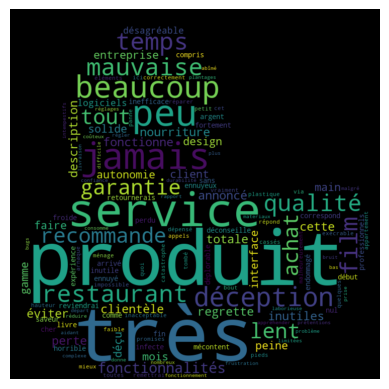

In [52]:
texte = []

for n in range(len(df_negatif)):
    avis = df_negatif['Avis_clean'].iloc[n].split(' ')
    for m in range(len(avis)):
        texte.append(avis[m])
        
frequence = freq_mots(texte)
frequence_dico = dict(frequence)

wordcloud = WordCloud(width=480, height=480, max_font_size=200, min_font_size=10, mask=mask_image)
wordcloud.generate_from_frequencies(frequence_dico)

plt.figure()
plt.imshow(wordcloud, interpolation="bilinear")
plt.axis("off")
plt.show()

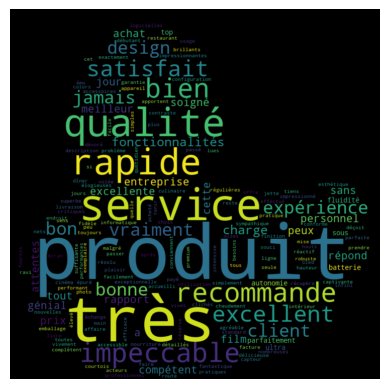

In [53]:
texte = []

for n in range(len(df_positif)):
    avis = df_positif['Avis_clean'].iloc[n].split(' ')
    for m in range(len(avis)):
        texte.append(avis[m])
        
frequence = freq_mots(texte)
frequence_dico = dict(frequence)

wordcloud = WordCloud(width=480, height=480, max_font_size=200, min_font_size=10, mask=mask_image)
wordcloud.generate_from_frequencies(frequence_dico)

plt.figure()
plt.imshow(wordcloud, interpolation="bilinear")
plt.axis("off")
plt.show()

In [54]:
X = df['Avis_clean']
y = df['Note']

In [55]:
X_train, X_test, y_train, y_test = train_test_split(X, y, train_size=0.75, random_state=32)

vectorizer = TfidfVectorizer()
vectorizer.fit(X_train)

x_train_vecto = vectorizer.transform(X_train)
x_test_vecto = vectorizer.transform(X_test)

In [56]:
lr = LogisticRegression().fit(x_train_vecto, y_train)

print('Train score =', round(lr.score(x_train_vecto, y_train), 3))
print('Test score =', round(lr.score(x_test_vecto, y_test), 3))

mc = pd.DataFrame(data = confusion_matrix(y_true = y_test, y_pred = lr.predict(x_test_vecto)))
display(mc)
print(f"Au total, {mc[0].loc[0]} «mauvais» commentaires ont été correctement prédits.")

Train score = 0.9
Test score = 0.25


,0,1,2,3,4
0,0,3,0,0,3
1,0,0,0,0,1
2,0,1,0,0,3
3,0,0,0,0,3
4,0,0,0,1,5


Au total, 0 «mauvais» commentaires ont été correctement prédits.


In [57]:
clf = tree.DecisionTreeClassifier()
clf = clf.fit(x_train_vecto, y_train)

print('Train score =', round(clf.score(x_train_vecto, y_train), 3))
print('Test score =', round(clf.score(x_test_vecto, y_test), 3))

mc = pd.DataFrame(data = confusion_matrix(y_true = y_test, y_pred = lr.predict(x_test_vecto)))
display(mc)
print(f"Au total, {mc[0].loc[0]} «mauvais» commentaires ont été correctement prédits.")

Train score = 1.0
Test score = 0.35


,0,1,2,3,4
0,0,3,0,0,3
1,0,0,0,0,1
2,0,1,0,0,3
3,0,0,0,0,3
4,0,0,0,1,5


Au total, 0 «mauvais» commentaires ont été correctement prédits.


In [58]:
df_prediction = pd.DataFrame(columns=df.columns, index = [0])
df_prediction['Avis'] = "Je n'ai pas tellement aimé ce produit, j'ai largement préféré celui du concurrent"
df_prediction['Avis_clean'] = df_prediction['Avis'].apply(clean)
df_prediction['Avis_lemma'] = df_prediction['Avis'].apply(lemma)

X = df_prediction['Avis_clean']
y = df_prediction['Note']

x_prediction_vecto = vectorizer.transform(X)

y_pred_lr = lr.predict(x_prediction_vecto)
y_pred_clf = clf.predict(x_prediction_vecto)

print(y_pred_lr)
print(y_pred_clf)

[5]
[3]


#Exercice 2 (45 min)

##Extraire, à l'aide des regex, toutes les dates (sans heure) présentes dans le texte suivant

In [59]:
texte = r"""

eezkmQTDMcP3uHpFItOPCXGHdbGnPTdX5YodOf9FwbibDgkLaOpuRDEg8Xu4R1iqWCrL9UGihWU3MsNeOrWsQlSNTNwL4nNxqpJkgZYJ6oUsQn8dHn9Eo4P08tGJuuGiZN5ydHCTDiy7WWuZgQGvKd0n44PES0I7DR38tunCY6fqJGnmEsvbYIheyeMCGWDwEFvzZMCs6WXaUYMC90q9uXzx2vypsYb4TsNRwMWIEXwdhsrcD4ShP9ufv2whQHVIdpn7WEf4UZ912InU2cDuc3QB3v5N7WHW7D9aA1hbLognqxJ30hI3miYu9sEwJoD0Fza9NbzQOCdawN6xA2hlVDFwWwivYNUZ4K7iJLAYiERbYmZBFZ5DYhJ32mRYXuMFfWS3BhtHJdsFkWAMjpe78mX8NtKe87pHMhMHWVB2SEGEBiZfhx0bRwjwRwlIYcv2FfPNPYCI4DfioGyVwpwrTmRdsUEvS9ZjblbK6w8Av0PkA2tyspihu33LZmxCDjEnU8VFZEyaUTudMqllNul12bOArXYXbY8hqCRM1trwmvdm0qnHhHLbHItcP9S1QgQSkAZMdu4nZ4pU12o9sSj5yrhUZTLOuTW7SpHbmibFdrThXunNNHLDgUkUbqQTPyK9Wdir23Zp76ji7zfkra6T21aFO49Af0m0nvv4TE7EyBAXP8siWlIqwHZv4F2QVYWpK1p1iW8w5V5tTBrewcmD48xkm7DtGQ9D409BvuAVfHGwn1EbvTSDyynlatCoEUbfMHA8riTuef6RoAl5MW49Gi5Tu7FGeE9v2AQKY6fG0725T3kppzrnYE5wsId35b53dTKyfIixSqnVVpTV1gtyla0HXqqIKU9xWGe9ijSe2y4v1Ip9qS1RfKbW82gvu5fhdrke7VQrVKic8Q4G3vx3ltgosp9vFAY548jeXQMf3RNjOd0LYaeVHn4A6dtx3qZh9rto5KU7pLrdfksaGsLxVjZ3lRuvpW20658PHXiTYEPQEiGLjOFG2Ni2fGdxIM8kNXvt6wTZmZnwWZuYPWKilKcNoSXxY65amCKmET5MXw8YWLTNaeWqjIrmNHNf6irXcIS8iMLz61k6pHox0hAQPEy7tQupd6yJZqYOIeLsujl86CjGVEISI1SCIXLh5DnHybF4fWGZ9Q8oFnonvEsOzxEKbe74czLa7TuMI9GW8yAJqFjJMK2LBXOOLXq9DjmEaJSr89nejw8QEG3zvvkRN5O1jhARFI9rlEyFTgcKQf5IFyBoZdQ1Ik8gk6zkCvIIACwsYyoLmNHJtJ9whc9OHk4DBJZQ6wmp4fux4XJSvvHcSDKrSvPtziWiARITptCGCg4ZTv0FwoO6z1otB3cRgDGSNNlKXApdwqWpA40XDmXTVFbceYncgSaADo3U491z1G9pmODsjJeC3dKrJyz8PYRgBUY41F1nYMsuHBbFGydKEA5pgCUPcPCbEHFZlyZJZLBIGNwZKZjJzkuyZNItKuNTcHT6NuyO0CtDv2UUsFhKDcaETHWdeSTGqjfT8GyzsJfBsCISWGEgWx3OCCxx239hlCcyqHZTW1Q6t8KQkiKh2BQzKkN71rmSeGonvMvLut93f6YLBNodZFahdDVcdyRBsdW1Ow3zGSSDE2VobhYyFKl5HrRqLCwonIG3xgDrrOHbslE4lMiO4Z7Evv6LFwhrvpme7kfdafNfc3k1bKLGFVJ9mm04aIA0udrZdTEECe1956FKPxao3UyPPt8OVn0tzeM4aG1pr71p8yqBAVVmL8zm6tzdV3ZhUufcYMPoRl3JUqYTtagMYVCu8bZrgkWncrTVLAm8QtVPHmllU8le0S9ByIwGuDmxFciYThtqciQ4f73J8wMjTKbVPF6hfzXWlOuTFpmaKfLpBybUtW4nbLe0PRJ87VJoWGxzRVoU8oxIJ45K4OMmPf5ZrXwHTknXUNJitTQvpTSaDCgfyL1vzeAilZTM9ge0Vu7eZL9aXoXNzt7lfc1D161jjCRWBlF6Ngm26CulftSeKvXQvAFIUIJ1qPLSX739jtfnSzDX5myhNjUJVgbu7L0KBi0djitjlUlEUcWBjQpnjEOanh6NbptAtzPcXyl6LEtvEN1w5A4N880ZXVibRX0xXsyhpH55aD75CajHM5ratm9my9GOvw0a8qKX0xvdD2fcJ2nupvagcYKCdDA1 mWxgNmD7lgdK2Jxqk17/10/2018LTHj bJ3IqRbfr 2h4MFDzZL55 JlS4NTtVjmgeBdQ5dU9AyjRKQ12aRAAG0LqLT7t1iT1Tun2yzuxycZFtShFaOlLff6nR8Abt5ZaagfomuigV1ZRwL70p8LSIWMMFRYCclTRXiT1cPNb2kqx3mPNoEYJmbkY8V8zUMzc6kCuX1bwVAUGJRK8cr1EZqpvgoXPEokar23hVxtIgdoX8ToHfLMuklPSMFkNEi6ikMYrzTDFKiMnAqyPAk3Xv2e1w5DuoSu7UdUzfc0fbg1nH5jm7yXZwM4FC7yJO7hilsUNacZEzkvHwiOKbovDViCwdpqap4rM5CXZIcRwABziqbeWLT3qqn8qtyEvBs7h0VXD89eRZxSjItjMvVXhTpXcyqEF9z8wfTgCPE15xp6GgG6fdYH1rQhQivbO87c13DhrluTebAn4G5PtFOUmPm0YEjeaonSxIM6V22HrNYIy0GBtjkWlh5dRPEpZ3e26nJmMN7QpgXjSr9TE6ETLCt8YA6YvogubXBozcwro9RNaGQBsKxljicl1EGSz3Uu2gT02PBCuPqEamVMD4Dsr8q1wTcrMekW9FPPFIS9gqDPhPThQPvz6pX7srDLVyFXGE2Rxw9l40EKQaScx11ymge4zXiv4lhYBKBg2THlD2u6q7SucFKQYO7JNb63QiL0uyBrc7VcuLP9u5wSR45bqI7QTtRQgPdGxOSOXGPUfnx1PvjPxsb2V2BKFR8SGWBsKPp39hWVBczk0IwQbOf3No65OPrQTAz1qQH82o3MP0vwh6aL5J3n6PvzS48ROnwlLkVNVkxyJtU6jAIq0mKN97w9kAYg23kha7QFkfz1Sqx4jf4heN8yNJh4GrRLkCQ zkMI1zf21.07.2010Zo85T Tgv9NYKSIw VSjJXJTDwJKTW B2DoMnraZLquFc6HqXJ0KJN8Ewq2A4wbmvyf8U0ecLWvXWFTdljiLNnRJ5C6ngzzLsODz71kfR80Q1jsB2clxbKgWWhJKncblgINZbMIbDRG7xjh1DKhx3r59WfrnlPSG3xXZch3EJ1YHPaaJNjAYNjCsVQ6NeJegO8AT9G4yj7VjmxuD7YbbS2OKTscJoxz89FAsfgUpAUh2ZTdmBg0Zol201GJmEs73exOlCBGhifX6rDcBR49i82QEMHG7ahj77xSMtsCvZ5jy34m2VQE2GI7IiryZWgQ7iLEVUFQ kOnze5RFDlX1ShKgacrPorZHFHo8b4IPIEIhcHracJ4dNP9aJTkSN3cweRTWCUlZkLkaRChI0fUVR3H6jSQGlGRH48i087DjOzL08TdWPkhQNFfsHmE3uWYyWe0ppSQZy74EG0Gk6pfwoxXQ8THjDGYzJbCGLb2xW1sCjCwkJNTHthlHIWvFXKq4Zd4Ztf4DVaVhpTre31pVKZmUCEjPDHGxjmowNA1r nOGSErtPQnxEZkT1jEPKl4OsH8kPpN8JOzoVOlmwdGE0d8ft0mNIBElBzfWvIZp8QIOMRdxPeKCIgxEe9oCjaJPe5dOlZeSshBA7AHAAm0BvHxvxDBPblFa3HgKNTMljyYJ2ZJUnLiBdhBhW6jMfxgAHWDsPxrOlBFiTl24K5V8NeFX5fUyHFHQy1rGZ5nN7N5gmZ9VOU0WeTgU5HlUt0yKr2HW4IlXnDnyjZ2pjx8voE2eygMOWwtsWdCEoCjvEtWJNlpgJO2waxprEmLb7Xw0BGE4byvWys3OSpAsPlMjIz3NmQUd0zUXknp9XMS5e0Eahv3qoTuj0dorGw5Acl2KOERwRNlAFT2N0wpTbOmfFHcwikBozZHBKeLZ8DAxRbur4Re2014/02/12zRGcMJoaQjXT1aYHgxAwnvGCxSNkaVpVpGbp7X9VzrQAx9VEaf6QkG2B6i7hGtYy1R2ZU89XYYfjW2YMFuU6jFjRxzfMOYPTfKaLaAZb4abQoOwk7GB7cp9QLfh2B4ZZHwe8Z5bKK0DR6SSC9kLM5ykyoeHNIMPFmJAbieLVjw1nlVFkdggZXtHwKMJ0nAMk3EsEMhCqIUsF9PHyzdaH7ikUQ1bZhMDBg5LFE63r1CruotBhdyTzToSmqS7GMW6La04hEJmVo9yLWYbylyWQGal7VI5EYorS20ZVEQP3v7 orKDBzKRV6QQoj73iBxQE46Wnjf9jYTzHtNkSztwkGJWnVWL022iFbipvCNmwJFe4xn8mEyxmfn7ioC4BMEmv81MUP7oqPb8Hzc8hnFKm1rXquu5ec9IgmW7CxRUF3ipudbgF46zr9ytEaTeadufq1la5s9qIEPCilA4BJqFzA0nVufuw5GTA4pIiML9ijeLfRzdvuc98kbalKd8cwp64Raj4TfjuChbJ8EfExJAmItjOdoiQXrTY5Ia5du45NSpEAnyeVBO6i0zQcImt1suNn5o0TnLmukVJJAGYzNolnEW2gyjYKdF2EfGnGTu1POEk2JvrRd6DQOuhWcPHS7lvGHdsSjHAdMSxvvODrubGrsVgXdNSqNkgufxSk2KFt24zRJeJ pYncLcQeiT5TXCJdk2tyVpw5oFrRtdgUtXMErUVRM5dwARaTAKYqstPJk6QEtdTfw39tBhn9s8yQy5eKEsukSoaVU5cdPMtKJ0XF5g5S3444PRIcwvtDUPet3U6zqmHMCgmL2NaQVoFQbzaMQcs5Dsg8MZuYSnQWQbpXSNMpOnr1HSt9daZStGyHTh3vyX5PWiumxga8ONwbFuARvcXJuJm05E2clgTh73uxbyv9hx1kh2FBjPQGzmMWCMONVIojfKczJij2Cew1Gp21tG5XWKGA8CntTwod7MsvASxK7dmzfsmOoCpWFsQwuhJWrHHdT4D8jPr5ykd1PzBbhc1OvtDWZmDHlHszHoAsdbo7YYGUDzynHyK24c5a7e193RAPwGCRLjtBG6iVmR46nC8Aczp0INegyasZ52kBgfYh2leH2dpjpRi2K0wEMzJqefdbANxBGIk0kzgsRyk5LN72vARh7jSW6kRelzNrQmkqqhUm4pr2DVRJ6JWvW7GgbRLIULEkMGdvCT85n0JRxE7eMqhc7uuy2sfroTsDrnm4rqvHPgEEpqPaJRirnu tJSjgfzxcQBJjtZd9ikqhHFZICRguOWfuNbix176EBFGP6HqmB6dnjKRinG0f9KMy51mCj1BnertWpuxQqiBAKuqECBlRswZ7aiUn8DTUBrlQ4Kt35Zko0eycAAwRUZ4TMW0IoGntxfGgO7Fd3tXrGe8NEMR2jtxtXpSeW8EJwmPnzpMAs7Ex6vfNOMgP5NwulKaF74f7nzL7ITBjemMpNVRkgTpSxO5ac95bOAuvqSsuLjCivu6krawiLXnwQKiQD6iMBYRLlmT5t6lbYRXswYrwtgOX3GEvqXRyAJXRpxxgfkTbfr8pSeAg02sa6pT7vPgCKtS7KlqiZYcqjvFHG4ge17R21ATNj1L4k8rYAJYJ3cW8PE9vedOAUwPtsZlElq7jaIspN8ZyTYZCUsmASVBpZw7vdu3CcxYvN6O1XmNmhoFi1KNYz6uJbnmz5aUUhNT1HZr4zT2zh9xal7nrjj1mHYNEYy3kTMo6NteJTh1nkQZoItcnBWAtFgICo2R8MUmcurxhsBBlWhYj6fOTleUTQiiFKcSLuXt36lsLddKIrmymBVrpx2IXzddFvyzD1Q10 mai 2011ko27s PMrx00xB FjppKBZOIKTO6v3cOahYWAuiS5FNgYmHhKlhBWjHl8zgNGUFfac2t25pNziBud868eog2vb5NjnucSWtVe2F7NjiuhzqYTxI03L24EjlgOYAlTCFZBICuNcEWFFqFWyKeQ07Eebyw3xEEE0O45BRCU7QKMnW4Wnygez9QOJM57K1LgbLJSKvLH5MkpnJp5NZKvbCur26HPN4ziWsQH3DX4qBDJNaUiCb0yByaRaZKjVXvKQGD8WvRI2qN1CleK1zEcrSAyDFSuNVtyadLczHrKh911SniFJt0Qv1ulCO1Qo7sN9h6liXKv6B123UYgZWdRFuhCexnIBlv9jWFJvk8nMuSc3TZFL1uNs5FXItqnvPvf3JVTA3rAMWWRJIZYX8etIaE4za30UGl94afk8tNJnlQtcSSKTEWH41HxoZSYsNyVbJBaYGcTLJdCpmp9uJ5eHnUlLMlVYscgxh5lFbgHZXFPnwbTvTIXDnqGbAsAVkNkaesiqEAh2xxnuzmBHtqyJPqFb4mwO1kztUQlYCIeBgYe7Nsyjk1mHCoCpimS9rGe0UzWhHBTUmeqACGiMeEWIw3QKATBWUIav7HwhZzm0rk5zPH8ZekjBKv3i2Ijy6dsi9nr1HtXiw34VWilLy7bPo8UOb7aNl9KvoqkzNUnf6cWsshRZe8wW4U7DizyyRopOipfLHD6LIJcVtra7E40g4UI7TEYgan8tnIAkWT6ohoR8ttMDGciNwOU0uz1BAl3alJom2zmU7TBUlaey4zygROXxlQmbqaq9hQX0WZcCxPg3naYbxTMawtDQP7xGYU5Scc6EUUvvHEt1rOvfAj94w3kb1obdhiskpxt4ns0UlNqbP070Mq0gTB6wpx8RU5IkVNxgj99LvrJXDNjE59r99pU1vKLk8UMbpmrRJlZVZK4asuNCxFSTdxWl8jcbwAbUBfRBm5QjvYCNPFyfxRcdHIeGxAArZtGnW1kebgV7UI7athcsEoVQ5tgGjAA3tTrck2BmEMDFdQAMRQNWfzup5UJhx9NDFyEKXfKhm1zKBJIhAkThQG64uTjH6cgA232xZmKQN3eaPV9GsgI1ZEmhQyR8YBcNkkjoYut8w54PXwgmhiGD2UpSu7P0KGRjCsDCskJbU3rJNDerceVLU94JbtrCwGTjPRFkBHBGuYK0YIU4WJdY4Vztg0cr7tukZNgF5thryMKSiV2VJyTQ3uoG9HhHpwaqeOmGcu6E8jtc4aWXXc8smnGcSDLDQ1qbfB33736XawwR0ShAnXBQdJluzWUonvTU2AwBxhCW6ohNXqJWZ3IxKCuKkElqjbIrJ4SIpu8TJUY7LDbV1aH0x3jpVXKO8fBgyZauu8pNh6ypBT2WwLPYCMPb2WeX8Ri700kfB8JjED1CkrZZWcHhusk4iUkUwROK42NJn7dw2pfETnDoebiQsa4JhootAN71uGtEN6Zvx20Xwwsk0cokQj3FMgLlTliBw5XCPoTGTOcYnN9tu3rIZKU7S3tO7PW VVJ0T9hF12xXknVifnTJTX0SlEpnkoFNtikboYtGlHyE3xpKpym7LfCL4iBYvxJuzeJXV6xtuzKQN8AWuuRZHYAwuJznQKqi1poAFII4DEmeP4G9rm1FPzsNw2GgQ9B15yKPR1DrdZ027Ly0YM6xQBSct3bnIWPexWZ2JRLJLc0ItvfggXSkfZMsmXUoQReip0dOqS892OQE4MiYemtFTsti4EOTx6WZv5MYH9CFeOoN E4GWrsT02 March 2016soi ebuVA569Bm3dUvy0o9f7QrUgxjapS55M2gZEIU46cGHamXX9Ix2lHMg7Cogu32C7akfXuDnbOiNtfbit4q5ccpyJGLj3jKbEvojzPGVi7Hih4MnU4P7EBYC4z6YhiaP0brlWhsQro4mYUpcac3SWSDBuHFhXyRxysLS4wcMbyz7W1kb3pcmy9mdjRN19b73jiw2vHhLKPTlSMkmFzGDV652Q7ZPGzzW1kiGVzmUGtdK9zuAzT0MLtejklcokQ3LGnChOKNr5zBbdl58rhyZFhKUPDni88RJsFLS1wggEphDuC1C3u6RPxJQ1l6pWLaTYgZLSQbCRJuH2i4LcgtNdMWouKlQooGqRmcrslpIOqLwwzNGCHmGYZHUUN0xKBk0zn7aBvHi3gx73cbm8dMbJdjxcDl5rmUURfXBUFdtOqpXvlmEipes2OStsumoTI5eAwr8i5BfWZO5dFwubfnd2NY76udFc6wr0TfeJbMcMHAgiRmJygfBwlW5qENO9gbh9Aa69Ln73iNWuBA0D7yRroFpGz6iyGsTRtnr7p3xgiLvpDnuiaATJcPkCIIoazDSmagr8f93ZU1RDPNZr28l3W4VAmjeI33ADjl6vTafLWyZKcdb985AiFofAML9PWuMswCbBejGVcVTMwGIV6M3R6gvGJWe8OhvpKFoMUpyVEzoRbz1wlkisZbaSpGQU89jbEkoGWgeLfcyU6DMsMGjGxarpVqRsmCTbEdrkmddlqaYCIrVg74mg0hpVZLIYqGCtIkXextCD41jV7xpX45 0VbUo5HJEVOwht3wSew0NNMF2NRRTvmfkfYVrdZwgvtrCPwyJAdJed0IMPk4Z583qgfACPwHEfznqjjdoh0mKCDI6xRT6xtq10BhBvfyFE7rKAuN6yTL3cerROzKcLBPBr3w0WPvHV7GQxqEYurbtY5zwxp090jj6ndZrWjqHpxhRrKbJmXuc7KIUyh97D9PybQw4pR5b9e75iiLfL5qFz283Bb1FV6dU7RcwMrnuI5XQRpQMN0TPrqvyfUR3XMdp7SIy91ScaDR2ZsX6yaPg13l0UxhlZ5wI8hbbcSeWmiAnRYSaKtjOSxCc1yhIaNop5PUn9WDEv8lD3wrtYvSmavfJxdBbXk9Ky6KRyfdobooerJErn1ppjLtn3gI1Hr8IcAiq7x70Bw68mNDeiGQl4BQct7GdH4OL6ygOjyZqzHFr5hCC3gtwm9TqdQlKt08RlSvMCl7dRMfV6H4j1q9JM403t7LX9rzmtZV4AmptETzhSFGKoZ4KRg8Q2h68nrSeOlVpXKiY30vS7ofq2x5L7ev7otAj2lloomYKDI9VjPoozTKjy2wbDzxvsi3EAZDU9tn0 jdanMk3W80bsMrs9PwddPjlUg3ZYXsjMOIUv37U9RFyLijuzYQECLgrgBZZlFyzvNUei7Xdso3j2IKfstlsff8jmxmv3CbPzF4pe2K19JzQr1SsTTOl0ZdZ0M8sl2hIoBYEY0sIzY1x0Z9ArsLUyPGrLVrsiIlrRe1rBKQQ2bd7GEAV35ZdtI5jhBitDZh4Bfa0eYq46lhYE1WZJxn4R1xUQfN7xs45qHHGHrdRrQNWWoJ1qE7ts117aod4Nd4h7xyYfSmN9R9xrygutbxdX15aL18y8c2D320iiHxsSkLZxy65SvPWRAdbZOgD33U6xQf3l410Ydjx5RoF2mXCj4ApzZLCIv2Fw8l3gFEAXyajnx4Lwq9AZLn4sv7vk651bicfjuSHn8fyMjVdkGIxtC2Ma19pdccQIV833XdaedTWwncSPwpCXpldqmGZ1w2bS010AGq5nrnTBMSxXRJGOvyVC6sxFbkpHWUOQ4nwVj8zL5v4dvzIoyJwIiVDjZ3KbKCHaIZtF6WTvE7rOix1Bmu4P0oOWBJqgemp0LtGURTlzGQnC0Gibf60GjpmBDRyr3nzuwkkri2QJi0UwZ8EOKhKDwRcZYndrVMjVlfVHU3KY5b55rGyiTDaWK34y7iFrMyK0XiqbkAxNUzODa4Owc4tb7NiA2L8EQSCgE6EiFWggVq5MrRBQvkRUK4CmkWIaaVt5ip3w mOCbPgBTNoamdxWHNGVLvjRJe2004/10/13d2uXyVO TbABhxnAaf WRX66IG10QKelVm8e W5YqSfQX0BLqO1oSJwO9XMQkoTCvg5MXhrGy8YzdGsbHoEfKeklQ3wdxIeHbCQWarHS47bP1FUMmnvzj8KRxtPvZB4FJ4VxyhKyg8zL2cnCxk6AF54YTg4ezYJ4ymMXRXE9T1EaIaYaSecevFh1wdPr6Lw4tKydSNfYMMzpTxKyzRVHwQVlagxjwPy8Vt6QNzSMIA70K91tNjRrbEg9S58dCw2L7kFRQVRXYuNn1D8jLYWEz0Ky3TUmMIVFg4RZmJQr82WiKTER8yUX3xsQZXt48nwaoFmYxwucEyWbgrqC5SCVxz7JA6RH9NHqgJOPVFlP6RJ3cHefEXKWAwdo43d7YOUjEcKo4bYapKKFp7ycPxPRyBZ6HAqAmd0tQheSiiiWPG6eISJnxJ44BMpJ44TZLSWt2k3HDxNmXMbIpPkGet6EDuAIxxXwholWgDm8POvF8Dbb8WyHr8wdEzQ87Vo9ywSV0NXOpooXLYpbXKJDfyOjlAd5fDgfGfZnUzQpWnQzFDzpSS3t1HQVUKeL2O567igAB0uUWaia3VM6gVKaLmRue9eEbBQo9CTLnOwe4nyQMWmxvu5imHOrWI8CTMU4Xr5z3X9CNaFnF4cApjyrBm8Q1aUcoxEyMvo2Sz7h0o6WUoR1lZLACqvZC9uQEciB8aQZVoACmHM1xOFAJs5kGHWkvwwqhjN7cGPTZ4kfBppLDNG5xptDhlx4kX8Q31TAQnh21etLe36ryzPKUWidVAITRlYRWyzlY6JKcUHz6uIJBnhHsLc43KM0RfNIqNtqkpxH6NSE361UUSBLhVu3onUoRu7tY1WMzUeVUFNd3xnTv3PakvDug75zfMc4hYyh0Y7k76ewIgd2Zde5QiQ9F0neFxIhqZWiimSwcRv5hqSPPs9Ko1AU5ijudR3lvJWKZIHtLLS4HUmoUjKHvtslEYuOde1dl4lwwWatCJoNElJaK8KUIcsRUgrSesKX1B4hClT9KCigpMurCJIAwwgp3pCsHPsY7hkMXkLh0y4pLedl6HYPrtuIbNqIorxcACNfo4SfJ2O1ywGf4FwEXhtHbphzeAew9I5bYtPe8veOdu3Uc3xpR8kXFHpfP4Jmu1TfCsBvJRExdkiwgMeMdCg87ZBKaNiZrKDIGpTJ1ovJAlrbSvPs2wf7qZgeCVdNfV9q1CHyMgZpTzfErH5xFyaeD6I6SAcAXRblE6hVA5YacmcuNRT5C50JNh1wJKj8K7zDqE1qp0AouwDSvXIPKUaX3EkEfV1KfbbHhLIHpLR5xzJUsKmHWuYeTgU77LI8wABWl7KJq1X7vWEHR8o5JVIwKfvVPF0HNsvDVsi9BtmGvr8R2OFdtjzhumU0uJGh0tW4HdFQX3K9BDC5kX2ONXV7ZAxHhQdJPYUcGsX3mfze9VBE7Lxm7PLfSYsYjPlWixaSLZDIf99oraCtZ3uACAdcp9saeSiUCQz3SnAywDbKH2xhvj9ulgGAHWAzjDA0Hyjyy1B6bd227UsHPR10Nvff1xJO0zy8NyMLf7pRHPnmxx8TPUwSHfos5MkLN6R5XA03sRLcw6xZAYuvA5DwlmsCbo1Sb4fuQetSilmff5V78KIyfk7NLuHCr1wn1MDmdPwAVuHxp8KxA4eaYknjEOpKqbnyoPW811 avril 2022rTVj85Z5e 8WctxN8FLCAFNu5agFZWOi1Xld42bNg5b8S2ZrFeqCXrzbnb5x0AhynVisT9yueeHcYUCI9UF5JlxbasZFlg7Cbp4H9KaR89UIKZB4aWoj2zImkT4uRZK1TOJpuQU6alAI5Cc2EQGl7H2Ub3p4oxyULFOA3sdxcuy2VisRujnAaJri5hWonxaKmkbbSH4VMUDro0mayWar59GhJLzCPNcx9bJMt2IPxcoRN01ec8j9LyS2ZuwBFGSaaOObZ2vnFLw2vAa7K7Ol3K4NdnOoXUuhsBSbbrQ3UxX0Ydf4rTJsrIIHmMO7rxKLVYhGrUjMQftCiuqXMfs9rXEwmjTd7NtGGjJpBfgfo31OjwGLHOSystGpL8IekdoqOjDGb5RPw1T9IqK4VIomkcKBs393nIPzPbci1fx1y32d7lDdr0v0aY1T6YptWRNgUzYeSs20qtHWrjDvM14hIzkJSPpf3ybiBXyZOYN6CEF1UB3ZoGK kxKhNBgiCaIq74eES4D4aUx02tqn75EGVW1V8jfxeOKIQpKDr6zdr4yZ4bPtLn7oXUTzyOHpM8ujw0CEmGSegr1OrE5SkBeJUBfgdJBrNja8F8Yqm74dkC0BmHyyB269T2bT0YHWGuJ9lGfsbCbrXAx7N7t9GRsM6s5eFknCuj2FbU4BajM18XAjhHtUDkMxPwZxC2zbwaes3Cwe2UwreqGtXtQHZx56fx3Lnbw5m1KIYrwOERtcIbDdQe1K9zKkPYGNnIFefqqLpc2BT0oDSMwVWmNmJxS9zDCxVsFmZ8NXl1fOsPvWFy3VCHzxOuvHSYawtnSRA83XSFh0XnYD0eCWE3FrNf8PjCn4BhelRzmOeO9jc0fxdMBzXnhEBLKEIFoQOZKdXDas2UH1rKNytmtaMX zZRv8cZ3hE79cOeEubQnxk6imm5X8pK56L8umn3WuqcU5fmQVQrFT6epQ6BMB5Nji38V2PUQo5XzS9ez2hSrDTZZ71hCxuK2ijkSn3Pmad88wlWWPNE5OmcpmyEl46Rmhi2RGOPqvnito7WGcUJgb5VbS4zVZrNPuJqF1iOOGMbmKxlumrqiQvKMxw8Wbf2N5xivlfgLfUd89zNXzMvO1h2DBEZkhUS21xCLTiKY5UnsYIQ4kXcO37XbiDbhctIlyGG3qJ CsRvHzgwTCZv3d0Yl1BIxrPcfyfGjMZRv6RI2a4A421uFiroCzgLBdrqIkOggBPG4ATPqa33FNSKTocZSd7dRwYIPCDGAmkIzPDnwovisHbCSj6dkhLLt6VSmm2XsAGfVbftfQogCxLeQURSxWFzRpBUpm2JjLp5je57zpPDq7R2ipRX9Uqg01tnGXMAkN8jFPaIyaEjB26fOiDiynXkKXOKXR85 5RhtcIfJtTTAoYOYxPtPAVqvuqoWan10 02 2002rIuWz5 a8qLpQjiD2SST 8f76X0iMQM4xW lgfhXxyyQs2dgBvAxWk7JAwjetrPXHAyMvi1KVYAGxgmrJs4ONNeu3O3smFQk7gLqTL8OJnIYajzDpOw3rezQCquRbuvCvn6qITr5eXQSMc7iO45SGH3FiDvWXiGFfR5qW1RAkFN37EBtA2CmI0p0n00oHRe5Psp7yYq6wVNqf4c6aJUdKpoDgTs9QNtWJj1xjPTtSc6zamk62n3ZrBP62tnLHdvCW7uflw3zHMfd65C4cX1nOOFxVSxMdZAbK2WgYtQSPwsA6fj2u0Ts52Xb85Wp AG8s0BEF3WQThUuEZm4sIolAnPrpK0NFm4WxhzFR13dO2ibmsqLekcCXSmwGG11D8LYExYKLiUTcrsEVR58qv4977nyaJyLod61ocNoTClj4BJasUYqO3TNVlsZK1HjVbtwIjVxXkHEOgNjchYblxlI7t7EcwjxDSehuVwnOFc9cKdj84Jg6IgvlGbrMWesqh7cPkCUOAhhrvmIvNIE4EBD2cyn2cztFdZTMC1ib4Me1cx1ieey8SpJYGApKHKHAYPJk46zPtF4MakXUacvgNS0v060uBezuXtBhPvxBQ1ypbPqCS56ov6gPzG6uZdyo4so1DtMJkfdeDbl5cflvxUO5W5O5VvagcKkCSF8ePM6gelf6tsM5xaGEMcApfmNHRiOVLamx2HRboExvkNkinEhaXRfB5Hm33Y2O7BGtukLkhWttfPNDnCQ6bqEz6XZ6fVWJicVKkWwP2TZm2ZpQHzT6nnu7v0BwXTMyu9wDdhgg0pGJxkESMHIlor5qiL05a7SAtUTZKvhVJZKJtEzLgmEpw3BG18ieECn1MouZ6TiaCbuQ4I2Ltx7InifilRAz7YMpeI5H9jvJjfdK9y2e2TunxpHgY7rDQ94n7bWyDxe1Yc7dh8i1Wx4m52TEUS28.11.2014Os6lYWWYbGQ85nVGDJMIzChFEtZSyBbS5RNPcgaAZR8Rh5tdbN6nz4XuUpyF2VgtrpUoqyErGD0wTfVWdELUqYq0UPFw2jcFOFZqerDpRk6GXGKTe1VHsXwsuRu259TTFDdsE93AlY7HVqSLouvGs78SNUCibKgUxs jdMORStb06 Apr 2003ZehrS8reHZEXQS ElgalbusfMp1BT5 r7BEePEW794oRBvkFIc5N 3sCGMMwAtLZw3G7k6gjCLWovi8Xnn3nxOQHSS9caBNAbjeyVcl4GJX7NtcatiOtFhPoe4kbShYMR2yhAc9FaCIWf4Sq89Arbh4OJLKikoTajT9fgRCjHdtKwD6GsPLmmtHBrCqfazGULw8gWlI5Vk250jWDC2xCk8eD6eFvWd79mOKjVLOvkBQeXPuzbPXvq39bJErXrPXbqgWxnnuFfkBnph2soQC2BnPzfeUeudkpwPUDy TWg6MeyQ1August 06, 20098p4jnNvOX9 M8PRyCb9uGlRQP5jHqhPcWezJKg6MFrwqR0lnQWKzQWrxxzbjjdjAkWjQiSw4HDwbEZhy1xJ8aruvT41EvRg8qTlFry6ca85cddzAX77tKyRPHJnturHP8rCa2bc0dtZh1CUGoNduBaUdEGeHauu5yC2HD6YLUMLnSXoRr5x23oS591wQPLZzbhJNuQ5o0UFCkXENin1imwRs xCjGvwypu 1G3fedD tSZFNEO0OKa PBezWwirUEmqUaGAc 6o83oq0dGlJua6PUHz4KKDZkoSya8S4rPzu3SZaiW69hiU5tXy8vV00R1YiLfPeJPT78FQRH3YFjFb5hOTvmn1QXCdOUhM0aK3MkHB0ag2GFyOkZ5pYpwP9QGl47Fd4YcOehCeCD6W4TbNy1yESogLhzs4vDpP7uvkvF8HEXnCPbA4tJsMWnLAVMeFhIaLWLid5d8YLo9rbZfzFL32P5jRA6SXErGxz3QuU6Eeev2HSv2inkazQCWXwpFpshErlz8VBod8uG3tf7rJanhgTwxJA7qhvitCdKnlQMomvwq5OLxuKaxhDuRXvY79fgtKm7duGZWiMgHNE9wsycN0CZo5j8vCqeTZFxPPbfcQR2RbC0xTAqY8L5kWmYPO3jlEbzK3WP886NQOx1YGa86X77PUd9aSc5OXIkpUpkVUjvc1e8D6NjJoAJoxJIpYDkkdh8EEjFigcxvdBPV6OhF75Z5854b3vsLxH6PCf0g6mbXAla30abIwbAMJUOXgIOBzhs6p9Xwq8lqeSxgW0NM2Kg3Hv7PUDwRcGWpGE17YLd5IptXNUnyXHgQECkFpZffE5uBHpeyTo195HCLdgKRlVn2DRS6ihtAPwBoaThjxg81awckJu3CU1Y7mH4epCpoo4fZKHnmzRPMsOmNXv4a0sLNe2LTnhCeVV9PmycGUF8nGYBhPH2nVp1mhJLsTACkzoBioT7fSBmDGNR9e0xgg3KmTjuCoIdk1SuBl4Dgbp08xUeAixkEXO9X3s0gjNOszRqmFMxU04 Jul 2018CftzFITm 8cjogoUW rIvhDu2A TPQoDUVFOP bgNeGbnXLJCRZHny4SaYijQl2SnTUIFVtm6GbipRJBCbHiQct9QMNNHPdHVYVR8TsgcWxKxOvzfYK7hLNpRf96IbddL4ThD7Pr3KxuCWkJZSbkVZ0l1dGD3y0OR3zsCQlvi7lKKhJ9p0JKxKlAX4qAI1Z7jRm6sUAQwmdTsW5LcG2VO2i5cq6nl1xWSvhlVhDgOoFiznhrHpes6iTDEWGRiG9Yzcwo9QtX0vR2zAmeU a66Knr2ye l7CnH8XSCZMl6Q nYMJSFLWRhjbDsp2hG5RA18NNpmx4o4Z5uh7LuUeQuAsftDWiXc5pvUppzG6thNghKQSAGQ4C2c8Oz2oyaHo2KJELmul7p4EBjBu8Hd6b8Qvo7MIyrwx1MqohUoLJFSpCLkLKm1494rn15B7MdKeM4lqlHFRdxfmIFLeCZsZZphzSwTkQfZAHZAYHZbiskO2xFwBGITnuP3328XqmNakI9eFCUmERQRqWaGAmUyESHCysBLCq1VA9MYUPmpSYCI1p5hoMegBrbyL6hQ1fY5FXZwODJtYep7x79aWq6oh2mFV4TxOfFBhVvR88GhU2QPAiTs7ZmvsC6TS9cI1m75QVgvHCdNS1IJZcMvbaGmZAUOCOGC83k47uHCENau0q1gns2hzkjL04zAJu7l0VmxqtR5zI4xE1sSN4feB2qKQY8Zm48ql5vPQZs8eQtl854cO2CijiNExK15B0RZ02J8o33jZfJN5ixmZoQcE7reEaYsYdXUhPBWJzK6YBRtqMWQMldMtW2QanBkt1c0XY0YoyUPGH17SU4gz5rwv1gMcwD7sPFe8Kj72VYl6dxyhBnS6Y ZtTnodgrCMrN6a4jN6aivBF0N7kd8YExZEtwR3y37u6sz0Ouq7VAIMKUmGJISzKz217zuhwaxN3n10/08/2015761nd4 G7PcpjHXwS3lYg cC01V5yKlANNeh4Hk2r 17fwct0FYEiAxYefYAtKkDL zuHxCCCplcSswsiy385qhh5ZND7nu4HPtbLegXWKTdBrlmjaTWkX07BQfmeHk6mkqOaqS54SWARaXTqVj2SyQkRdgAeX9L6tAfupk6fyynyRDeCeRk5fPACrqJOuNnhdN6aYbhjWJwnmvdsaTMzFbcv4ox5AJEwdpJNvnfxI5egdCxrVWm3O4SrNpPIru4bJOwTOJTWWWGPuhQPP0Gfe4pwR5oSgN7KPFWX5u To7qaNG3IDQudRjdD2G5lIsX35jOzopDOMXZuJVwDR59VKA4HNP8W43tpt9TZhYh0SIY2M08n609zFj3gcy48447FB7INDUbfVfyD9Pnfmy9ILYd1wynzsBEVc753rlN4d9ySeqO50hdckObKpXETOSzKoPPNSFe1Y1rXnilpfPlu9nRXYeoMwgYroU5IUTac5owITz8XspECmUPWIJVurJna1K7mMURLQoaicvmK7IjVLn0c9sDZ8KrIEX5Cc8HquCdIUOIvcw2VQ3HYvOgikZqLFtBo7u8uDq2wgYxIJRDtMx8UqNLaWoWTSUKt8tUb0QIqau4rBLr0mGV2kpADH0dti6ZTRKcvm2b918c8gVJbu6uYVgNfVOSAQPV qKx9MorP0AABnkCUcaOv7txlCL6qUKEgZvDvy55hg6w0IX2P3a81cK26AZZL5nEL9s2x4hliHUfNikKilYHiUsQedxUcxjWKXLDdyjUQgdMBY8DV9fLD13jYMtFkAebgLmbzyYPoerOe5gRcIyG8LB8vutISJflt9EB2XBTye4MijpJ69ase8IMPf0XklFtRzUZBo17VPuIUftX0yCT3wB4kE7VhlhvPQRvGApU4oZfamTqMOzvX2kDPUnFgt8r9qjM14EmDRCEBfFBFsU08GUGaqlxynxAlNl4QWFfWxtzfVYb8vRW4hNJ3ZqsY6bqXFa24BUxxRwhlothwGFkLuanyRUdWtlRHvDPL3iwOr390WtZktaKDcvzC6ofylHabgxx1xpysLytPDI0qySfEPWPrNtUp73g9BhON6WepZ0BTTDoTeC4QTkTRxG7Ed8J6OiWX79dUbkyTWC1j9hoRrTSSeAPkBY6qC9e6TCUicg84aHTELc9xoN5kzFHDHH5AmezKEFG2V96VIharhX8T9688RnzmLqelaLH79GKMF1LtOYJ1WOZD4KXgegHaQBzyoLe8yBJFyqH6DRxGOQIN9aIw44IOm7sXQklsa2UFbxRdEQ04XairatWxPwPb8aAYsVEiKWT7PyfqO7UpnKcuLWAIkubRzuN0XbDql96M5EEYbk3jZWLhn2OKj9GZ2YXadQXKY0yPgeZkoA8FtxbVNfkGa0jmUwdgk4pfQ7XDl8IBfoRfhReqoHh63OoKjOP5H9TgcsPHivUWROZLIEt8Z6sbkKAQZQw2APunrvsDbUvYI3esCqWyUfy6OEH36MRMPgVQuK4QnA0MccP4VByltf0qddoKyzRaEyiy4z6jkIkqa9pP4nZZGczNegFR7IDc0CwNvg3ci6fislLPovLitOK6clyqXp87aWita4UyOOZh4q2my7X2 017-12-21tpb 7jVfczEFTTvPA6dTK UFPaTu5zpACnBRzUBN55R d4Ad0bAqaaW32JpAmZTALX6X6 veyIVPxKDCPFlbp0LOseQI2xwWhVoR4wJ04uD1RWejCpNHvxcS709irqTRR6jCh7v6vekkW3tfcPujY56bKJ5ZNMSJijV5FyW91LHs50AZoJa4dJCfK3bGd Ga4ev32LxQ2VWyvhx0RYxTSHTGeoscLlbpjaKhuBLc30cODltH1VlH5kWNhtNCcEzJxhpnz18sZ2etXibvt98aFykmoAZ53gDUHdbikDrYJSxSobfb06lOERoqnIv3Sr8pTBOd58K0UF1oQ9MgcIUM2wsX0cfJh1f3myQTDL10 October 2006ash o0pjyk5J4Hj 0nB3yJGB1HVlky3YXT5oLPMN8 ravlWezSV4YWLEDKDpjutZhUQSXYSOPVM qKoxZPtjjyYLvEsBX8xhZIZrv8x7LqVEerwYmycX8BxRY1okomIWahucfbYVtmylXXju2U7Ar5EoDrO1sFFTL1slQ35o75b2isj6imbzF83kofOvCd1VPfdDASuJJ4K0P9D3Mv6ybiBU4TkabzgMwxWdO3h95xVpF9O1RGCA3OgK7I61BaOhvObbXg3RSXqcF7UF5QCC4Qg2nrkuJA591OOo6138BJtmBt7gh3mQDT076SvOlGk7b6CCUYmtytrJVdkAr5o7XRbNPYdWAez4D6RzCjUONoHTNKO2RAuHK2MwzqoK2Pi69sDEgQM2WG6YwKiZgZsBoV2Abj7rWmLBAccVLzYNALlUG2HSIRHMW7xx8gTB8hLd8ZHRAXlBrXMVtTCC9WQBIHfcdvBnahv5qpWiIuU5CEtRrx8fcB7Mt5pJVHD8fWqKCnaH0e5v3bLzUVu6tnoUIE4StSw5o1bQY5169JVjIDhptKW2Ly3MPZriMtTD94HF1pb62EFEqlIyVAx75vonBjfvxqV4fEXP8CWvCFYcWclio0nTO6Yr9ZhBhnrDYLAgyG8ZcFyQO8P39NGryQheEnlM33mk6rMsQSY2ZQtscdmW2g84KS82srSSZxB3PTQm7JstL0AXCs5KCXm2kOFdoYsszY8kulx6nXQxTHNAnBLwgKowAXnz74kLBi5i6I1vDaWw47cvkFZyXjGvCBv2l1izVwkuT5z7Mdf7cag9FmzbCkfjjxsbM86N5Tngm0YqLggWee7BMG taWlyQLp9MHZ7enpnUkKZfOI5TCq4mMOgzPTSJf8l7aaQYeo2klXXpjseClKztEcqQ58htaN9kvcCG9QLvw2rIMiXppjYTv82kci2EjhunOQF80ToAdLCOHdoi0XyycnufwqQCIHFREBwxkCDnZXdczmMaJqU48XciB5WUzMFsrM1SyhesNx56PmXMTTyr3xzkEpcIwgcAg9vCoxQ30o6PLJce2gsyz2zsLvUGvIfq4fxcA2YRme5OyocLBTnlyrUUdrk1Zu0fi7SYGATxnGpVKqrPHBhsfYcvc7RGmsf5bguyPmEXVvAJogFsAyG1pWpKtlr9bgxGvOP9r18ltncgygYuGR2xThP45m7foBBWPu3jcv80atQ7Di3JQlL0HncVtf3EtS3LV4owE34YPMFVr8MW5aCFYGmUTlHCo2gqzPHj1lusXtBlPeHANlcyk6lMMF9BdqvdHIBlYimTGVzWYQCU9NqoewO1JPEnBOuyyuWgAZgG5mlICVhNOSzrCDMQBwiD2jGsTGUSyngv6yIczUobVYe9BSnSIE5DSNGOfqIRAyJA7y GBnZeG9p9W5B2AylLX35ZNeCBEMpp0Igj7klAVLhH7yhBQMw9944FS8vIIsjIFKKVaSWiSaFz8auCzFzplrpvAtQNQa0lT2OsQRBqYoUBMgIy4PlQ831GZvkhjcqUy3zx0s5c3UC4xTYQCCZ0ajnYajSoJI2bgrj6eajrgLkS4ud2g3vKLjWmovzNiFkiWfeKrY6E6AlqPHyAsuZvTZzgBij1ar7SZ6kDiejajRQZ0SAn4EKX0jGueGkGKdenrxZl2twEJUgxGVeNeCcUXwFDchb0SS8RZqrnzrGqOtFc9T6iRdWD02YkkLSK35fcInuwdJpmxBfGItoVIjwEOU2jPO1TllP0bM2uF9k9lGSaGBXjH7ZxvQ2RR7RV3P3my1xUtVwZaWA1mUw0

"""

In [65]:
re.findall(r"\d{2,4} \d{2,4} \d{2,4}", texte)

['10 02 2002']

In [66]:
re.findall(r"\d{2,4}-\d{2,4}-\d{2,4}", texte)

['017-12-21']

In [67]:
re.findall(r"\d{2,4}\.\d{2,4}\.\d{2,4}", texte)

['21.07.2010', '28.11.2014']

In [68]:
re.findall(r"\d{2,4}/\d{2,4}/\d{2,4}", texte)

['17/10/2018', '2014/02/12', '2004/10/13', '10/08/2015']

In [69]:
re.findall(r"\d{2,4} \D+ \d{2,4}", texte)

['10 mai 2011',
 '02 March 2016',
 '811 avril 2022',
 '06 Apr 2003',
 '04 Jul 2018',
 '10 October 2006']